In [5]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv('malaysia_parcel_volumes.csv')

In [7]:
print(data)

          Date  Parcel Volume
0   2017-01-01           1000
1   2017-02-01            900
2   2017-03-01           1100
3   2017-04-01           1300
4   2017-05-01           1500
5   2017-06-01           1700
6   2017-07-01           1900
7   2017-08-01           1800
8   2017-09-01           1400
9   2017-10-01           1200
10  2017-11-01           1000
11  2017-12-01            900
12  2018-01-01           1100
13  2018-02-01           1000
14  2018-03-01           1200


In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

In [10]:
dates = data['Date']
volumes = data['Parcel Volume']

In [11]:
data.describe()

,Date,Parcel Volume,Days
count,15,15.000000,15.000000
mean,2017-08-01 04:48:00,1266.666667,212.200000
min,2017-01-01 00:00:00,900.000000,0.000000
25%,2017-04-16 00:00:00,1000.000000,105.000000
50%,2017-08-01 00:00:00,1200.000000,212.000000
75%,2017-11-16 00:00:00,1450.000000,319.000000
max,2018-03-01 00:00:00,1900.000000,424.000000
std,NaN,326.598632,136.115077


In [12]:
X = DataFrame(data, columns=['Date'])
y = DataFrame(data, columns=['Parcel Volume'])

In [13]:
print(data)

         Date  Parcel Volume  Days
0  2017-01-01           1000     0
1  2017-02-01            900    31
2  2017-03-01           1100    59
3  2017-04-01           1300    90
4  2017-05-01           1500   120
5  2017-06-01           1700   151
6  2017-07-01           1900   181
7  2017-08-01           1800   212
8  2017-09-01           1400   243
9  2017-10-01           1200   273
10 2017-11-01           1000   304
11 2017-12-01            900   334
12 2018-01-01           1100   365
13 2018-02-01           1000   396
14 2018-03-01           1200   424


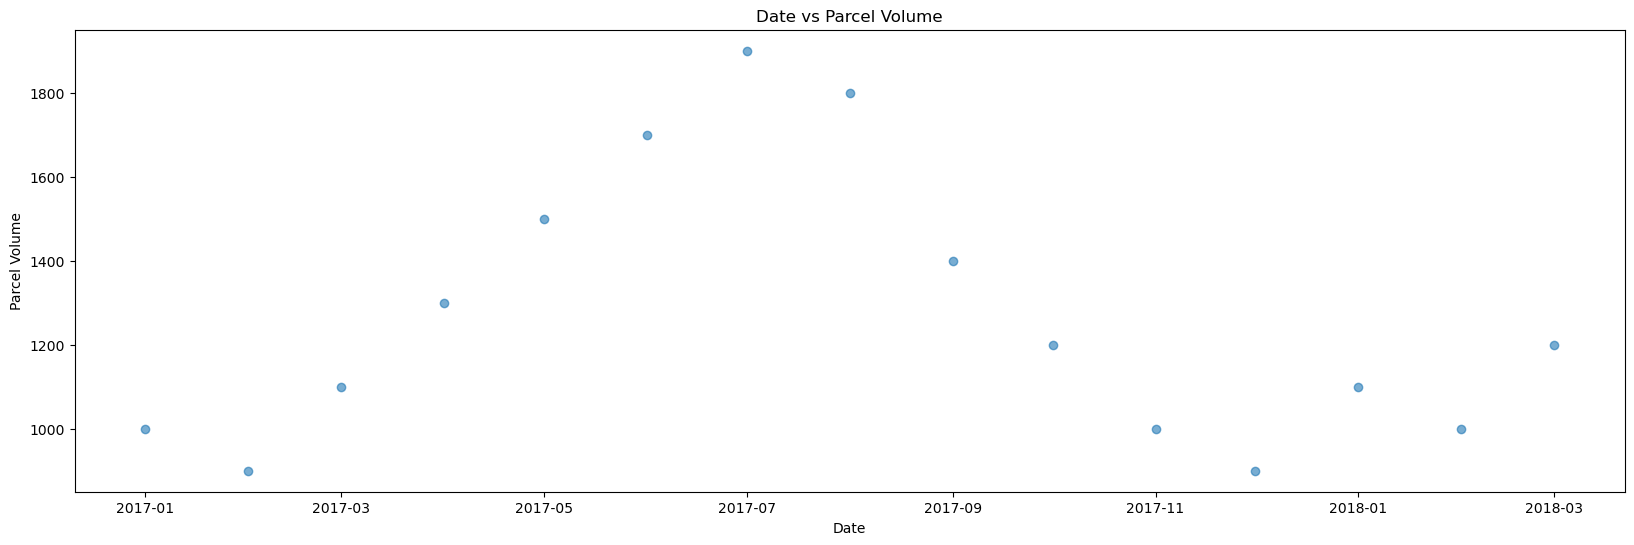

In [14]:
plt.figure(figsize=(20,6))
plt.scatter(dates, volumes, alpha=0.6)
plt.title('Date vs Parcel Volume')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.show()

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
regression = LinearRegression() 
regression.fit(X_train,y_train)

LinearRegression()

In [17]:
regression.coef_

array([[-5.36283867e-15]])

In [18]:
regression.intercept_

array([9378.78240124])

In [19]:
data['NumericDate'] = (data['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [20]:
X = data[["NumericDate"]]
y = data["Parcel Volume"]

In [21]:
regression = LinearRegression()
regression.fit(X,y)

LinearRegression()

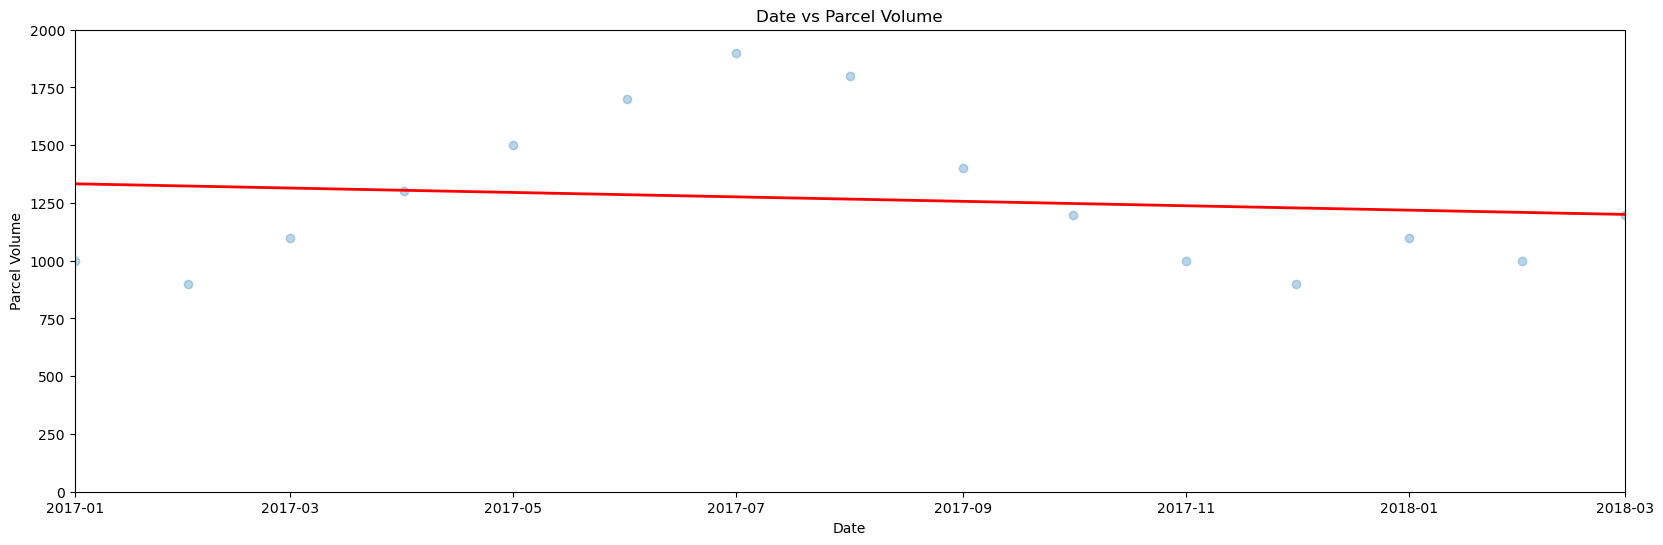

In [22]:
plt.figure(figsize=(20,6)) 
plt.scatter(data['Date'],y, alpha=0.3) 
plt.plot(data['Date'], regression.predict(X) ,color='red',linewidth=2) 
plt.title('Date vs Parcel Volume') 
plt.xlabel('Date') 
plt.ylabel('Parcel Volume') 
plt.ylim(0,2000) 
plt.xlim(data['Date'].min(),data['Date'].max()) 
plt.show()

In [23]:
regression.score(X,y)

0.016980264260136546

In [26]:
# 1. Create a float or integer number: 
your_number = regression.score(X, y) 
# 2. Convert the number to a string value: 
percentage = "{:.0%}".format(your_number) 
# alternative for Python 3.6+: 
percentage = f"{your_number:.0%}" 
# 3. Print the result 
print(percentage)

2%
